<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8,random_state=43)

In [7]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


In [11]:
y_predicted = model.predict(X_test)

In [12]:
model.predict_proba(X_test)

array([[0.0150335 , 0.9849665 ],
       [0.0206307 , 0.9793693 ],
       [0.94814392, 0.05185608],
       [0.91854475, 0.08145525],
       [0.04501788, 0.95498212],
       [0.89095551, 0.10904449]])

In [13]:
model.score(X_test,y_test)

0.8333333333333334

In [14]:
y_predicted

array([1, 1, 0, 0, 1, 0])

In [15]:
X_test

,age
8,62
7,60
10,18
20,21
6,55
26,23


**model.coef_ indicates value of m in y=m*x + b equation**

In [16]:
model.coef_

array([[0.16109911]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [17]:
model.intercept_

array([-5.80581805])

**Lets defined sigmoid function now and do the math with hand**

In [18]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [19]:
def prediction_function(age):
    z = 0.161 * age - 5.80
    y = sigmoid(z)
    return y

In [25]:
age = 30
prediction_function(age)

np.float64(0.27488050221017696)

**0.274 is less than 0.5 which means person with 35 age will *not* buy insurance**


In [26]:
age = 99
prediction_function(age)

np.float64(0.9999604932694741)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ---------------------------
# Step 1: Load dataset
# ---------------------------
df = pd.read_csv("weight-height.csv")

# Encode Gender: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Height', 'Weight']].values
y = df['Gender'].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape (n, 3)

# ---------------------------
# Step 2: Sigmoid Function
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------------------------
# Step 3: Loss Function (Binary Cross Entropy)
# ---------------------------
def compute_loss(y, y_pred):
    m = len(y)
    epsilon = 1e-8  # avoid log(0)
    return - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1-y) * np.log(1 - y_pred + epsilon))



In [33]:
m, n = X.shape
print(n)

3


In [47]:
# -------------------------------
# Step 4: Gradient Descent
# -------------------------------

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for epoch in range(epochs):
        # Predicted values
        y_pred = np.dot(X, theta)
        
        # Compute loss (Mean Squared Error)
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        loss_history.append(loss)
        
        # Gradient calculation
        gradient = (1 / m) * np.dot(X.T, (y_pred - y))
        
        # Update parameters
        theta = theta - lr * gradient

    return theta, loss_history

# Assistant
The error occurs because of inconsistent indentation in your code. Python is very strict about indentation, and the indentation in your function is not consistent.

The issue is with the indentation of the `for` loop and the `return` statement. The `for` loop has extra spaces at the beginning, and the `return` statement is at the same indentation level as the loop body, which means it will return after just one iteration.

Would you like me to provide the corrected code?

# Assistant
The error occurs because of inconsistent indentation in your code. Python is very strict about indentation, and the indentation in your function is not consistent.

The issue is with the indentation of the `for` loop and the `return` statement. The `for` loop has extra spaces at the beginning, and the `return` statement is at the same indentation level as the loop body, which means it will return after just one iteration.

Would you like me to provide the corrected code?

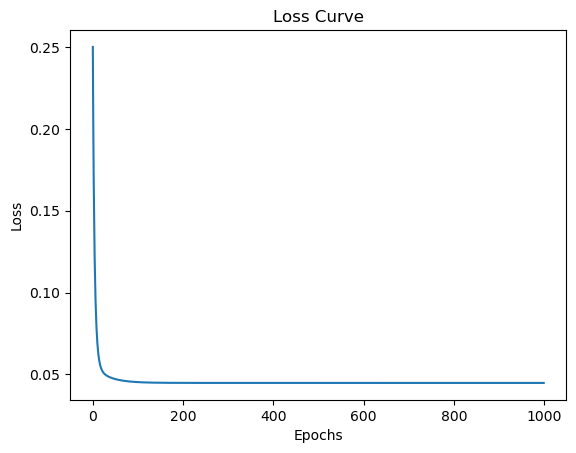

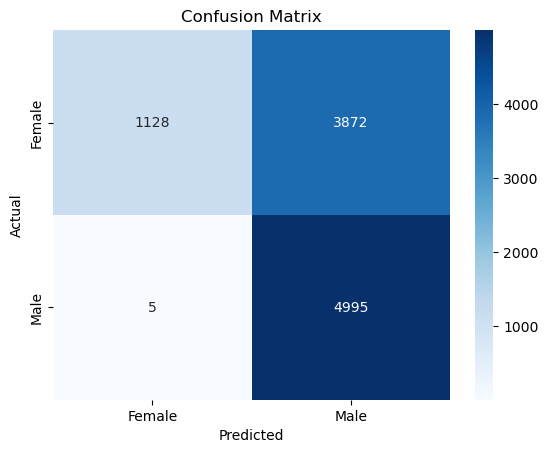

              precision    recall  f1-score   support

      Female       1.00      0.23      0.37      5000
        Male       0.56      1.00      0.72      5000

    accuracy                           0.61     10000
   macro avg       0.78      0.61      0.54     10000
weighted avg       0.78      0.61      0.54     10000



In [48]:


# ---------------------------
# Step 5: Train Model
# ---------------------------
theta, loss_history = gradient_descent(X, y, lr=0.1, epochs=1000)

# ---------------------------
# Step 6: Predictions
# ---------------------------
y_pred_prob = sigmoid(np.dot(X, theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

# ---------------------------
# Step 7: Plot Loss Curve
# ---------------------------
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# ---------------------------
# Step 8: Confusion Matrix
# ---------------------------
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Female", "Male"],
            yticklabels=["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# Step 9: Classification Report
# ---------------------------
print(classification_report(y, y_pred, target_names=["Female", "Male"]))

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("HR_comma_sep.csv")

print("Dataset Loaded Successfully")
df.head()


Dataset Loaded Successfully


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
left
0    11428
1     3571
Name: count, dtype: int64


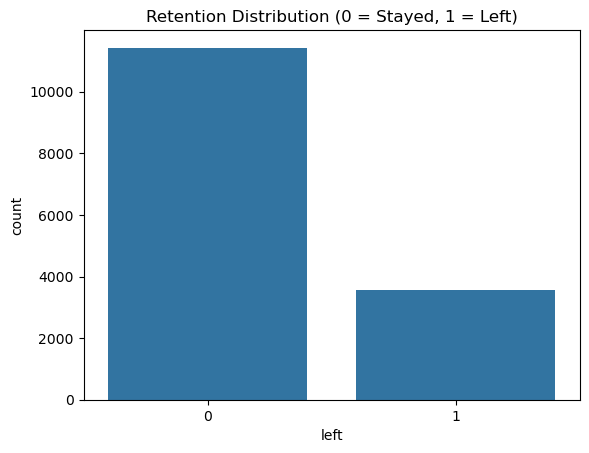

In [50]:
print(df.isnull().sum())
print(df['left'].value_counts())

sns.countplot(x='left', data=df)
plt.title("Retention Distribution (0 = Stayed, 1 = Left)")
plt.show()


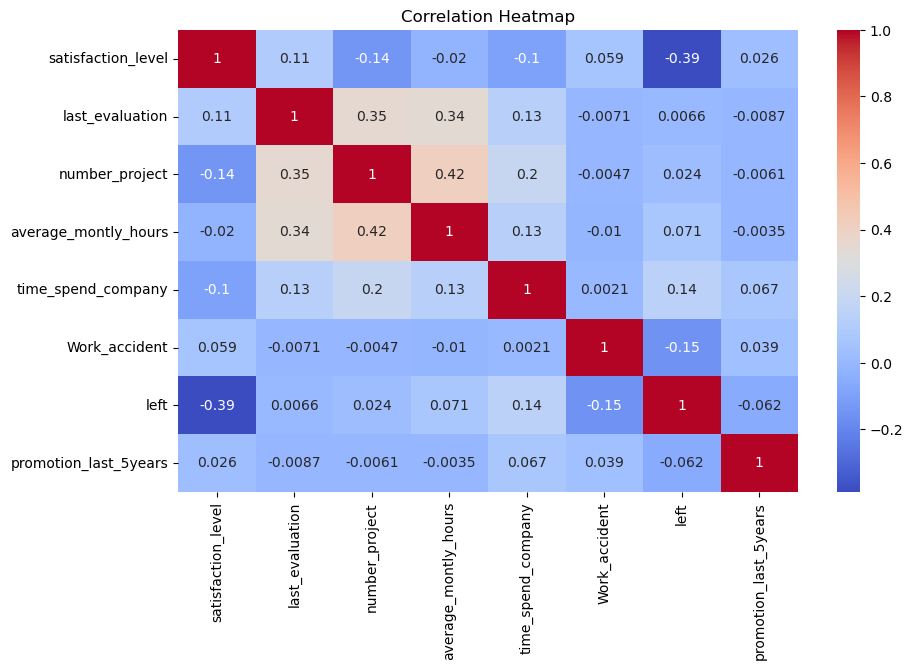

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


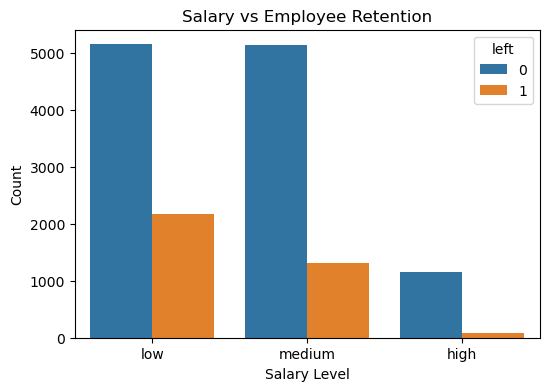

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='salary', hue='left', data=df)
plt.title("Salary vs Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.show()


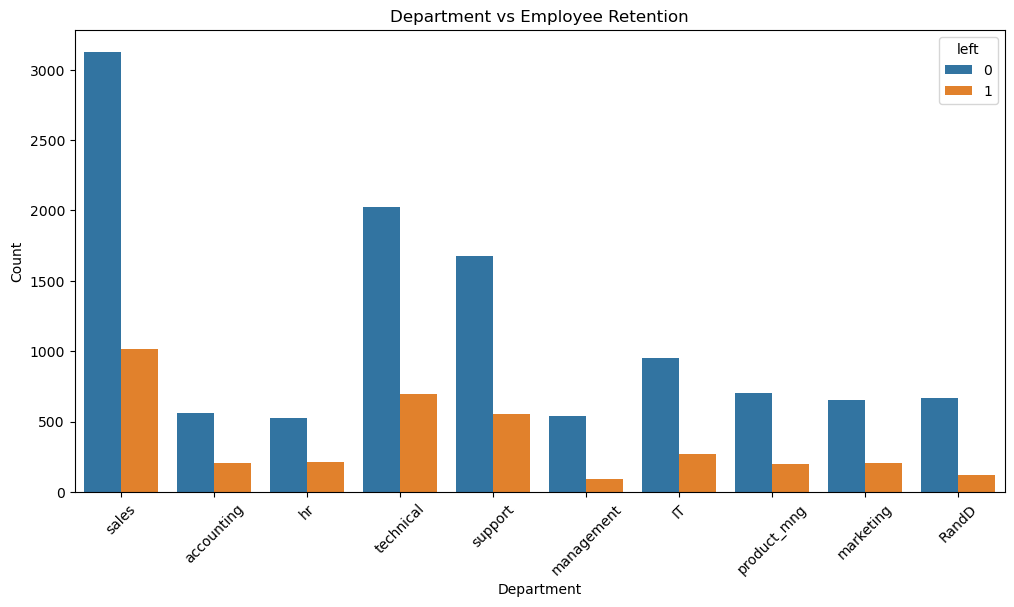

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='Department', hue='left', data=df)
plt.xticks(rotation=45)
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()


In [54]:
# Encode salary to numerical
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})

# One-hot encoding for Department
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

X = df.drop('left', axis=1)
y = df['left']


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


In [57]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7866666666666666

Confusion Matrix:
 [[2120  174]
 [ 466  240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.34      0.43       706

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.76      0.79      0.77      3000

